## Курсовой проект по статистике. EDA.


## Содержание

[Требования](#requests)

[Набор данных](#dataset)

[Анализ предметной области](#app_domain)

[Настройка среды. Загрузка данных](#loader)

[Первичный анализ параметров](#analisis_par)

- [наклон таза (pelvic tilt)](#pelvic_tilt)
- [угол таза (pelvic incidence)](#pelvic_incidence)
- [угол поясничного лордоза (lumbar lordosis angle)](#lumbar_lordosis_angle)
- [крестцовый склон (sacral slope)](#sacral_slope)
- [радиус таза (pelvic radius)](#pelvic_radius)
- [степень спондилолистеза (grade of spondylolisthesis)](#spondylolisthesis)

[Анализ корреляции признаков](#corr)

## Требования [<a class='anchor' id='requests'>](http://)
Выбрать тему для курсового проекта. Курсовой по желанию. Данные с kaggle.com
Варианты тем:

1. **EDA (рассчитать описательные статистики + графический анализ с выводами)**
2. Тестирование гипотезы (условия применимости того или иного критерия проверить, можно с графиками+ провести тестирование, оформить вывод)
3. Линейная регрессия (условия применимости метода проверить, можно с графиками, построить модель, исследовать на статистическую значимость модель, можно и коэффициенты (самостоятельное изучение), коэффициент детерминации)
4. Однофакторный или двухфакторный дисперсионный анализ (обязательно условия применимости исследовать, провести анализ, оформить вывод)

*Требования к оформлению: название темы, сопроводительный текст к действиям, что и почему делаете, какой вывод.
Срок сдачи-до 07.09.21*

##  Набор данных [<a class='anchor' id='dataset'>](http://)
Biomechanical features of orthopedic patients
Classifying patients based on six features
https://www.kaggle.com/uciml/biomechanical-features-of-orthopedic-patients?select=column_3C_weka.csv

Первая задача состоит в том, чтобы отнести пациентов к одной из трех категорий: нормальные (100 пациентов), грыжа диска (60 пациентов) или спондилолистез (150 пациентов).
Описание полей:

Каждый пациент представлен в наборе данных шестью биомеханическими атрибутами, определяемыми формой и ориентацией таза и поясничного отдела позвоночника (каждый из них представляет собой столбец):

- угол таза (pelvic incidence)
- наклон таза (pelvic tilt)
- угол поясничного лордоза (lumbar lordosis angle)
- крестцовый склон (sacral slope)
- радиус таза (pelvic radius)
- степень спондилолистеза (grade of spondylolisthesis)

## Анализ предметной области  [<a class='anchor' id='app_domain'>](http://)
Pelvic Incidence: A Predictive Factor for Three-Dimensional Acetabular Orientation—A Preliminary Study
https://www.hindawi.com/journals/ari/2014/594650/

<img src="594650.jpg">

**pelvic incidence**
Угол таза определяется как угол между линией, перпендикулярной крестцовой пластине в ее средней точке, и линией, соединяющей эту точку с-осью головки бедренной кости. Большой таз соответствует тазу с горизонтальным крестцом и небольшой шириной подвздошной кости; малый таз указывает на таз с вертикальным крестцом и большой шириной подвздошной кости (рис. 2).

**pelvic tilt**
Наклон таза определяется (1) линией, проходящей через среднюю точку крестцовой пластинки и средней точкой осей головки бедренной кости, и (2) вертикальной линией, проходящей через среднюю точку оси головки бедренной кости. Наклон таза положительный, когда крестцовая пластина находится за бедром, и отрицательный, когда она находится перед ним (рис. 2).

**sacral slope**
Крестцовый наклон определяется как угол между крестцовой пластиной и горизонтальной линией. Вертикальный крестец описывается низким значением наклона крестца, а горизонтальный крестец - высоким значением наклона крестца (рис. 2).

#### Болезни
**Спондилолистез** – это смещение (соскальзывание) тела вышележащего позвонка относительно тела нижележащего позвонка. Чаще всего возникает соскальзывание тела пятого поясничного позвонка над телом первого крестцового. Причиной спондилолистеза может быть спондилолиз, травма позвоночника, нарушение осанки с горизонтальным положением крестца. Иногда причиной спондилолистеза становятся дегенеративные процессы в межпозвонковых суставах или межпозвонковом диске.
http://www.orthosmolensk.ru/zabolevaniya/detskie-zabolevaniya/spondilolistez

**Межпозвонковая гры́жа** (грыжа межпозвоночного диска) — это выпячивание (экструзия) ядра межпозвоночного диска в позвоночный канал в результате нарушения целостности фиброзного кольца.
https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%B6%D0%BF%D0%BE%D0%B7%D0%B2%D0%BE%D0%BD%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D0%B3%D1%80%D1%8B%D0%B6%D0%B0

> Предполагается, что получение параметров, которые описывают положение таза пациента в 3D пространстве может предсказать развитие той или иной болезни (Спондилолистез, Межпозвонковая грыжа).
>

## Настройка среды. Загрузка данных [<a class='anchor' id='loader'>](http://)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
PREP_DATASET = 'column_3C_weka.csv'


In [4]:
# первый взгляд на параметр
def first_look(Series1, max_count=0, bins=10, quan=0.999):
    Series = Series1.copy()
    # простая корректировка по выбросам
    # Series.drop(Series[Series > Series.quantile(quan)].index, inplace=True)
    # расчет основных значений
    Series_mean = round(Series.mean(), 2)
    Series_median = Series.median()
    Series_name = Series.name
    # расчет максимального выброса
    max_count=np.histogram(Series, bins=bins)[0].max()

    plt.figure(figsize = (16, 8))
    Series.hist(bins=bins)
    plt.ylabel('Count')
    plt.xlabel(Series_name)
    # отображение среднего и медианы
    y = np.linspace(0, max_count, bins)
    plt.plot([Series_mean] * bins, y, label='mean  : {:,.2f}'.format(Series_mean),  linewidth=4)
    plt.plot([Series_median] * bins, y, label='median: {:,.2f}'.format(Series_median),  linewidth=4)
    plt.legend()
    plt.title( Series_name + ' distribution')
    plt.show()
    sqd = round(np.std(Series1), 2)
    # print(f'Среднее квадратичное отклонение {sqd}')

In [5]:
df = pd.read_csv(PREP_DATASET)
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [6]:
df['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

> **Вывод** Классы не сбалансированные, требуется балансировка для правильной работы алгоритмов классификации.

In [7]:
df_norm = df[df['class'] == 'Normal']
df_norm.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
std,12.368161,6.778503,12.361388,9.624004,9.014246,6.307483
min,30.741938,-5.845994,19.071075,17.386972,100.501192,-11.058179
25%,42.817849,8.799951,35.000000,32.340487,118.182659,-1.511360
50%,50.123115,13.482435,42.638923,37.059694,123.874328,1.152710
75%,61.470097,16.785953,51.602346,44.608788,129.040401,4.968807
max,89.834676,29.894119,90.563461,67.195460,147.894637,31.172767


In [8]:
df.isnull().values.any()

False

> Пропуски в наборе отсутствуют

## Первичный анализ параметров [<a class='anchor' id='analisis_par'>](http://)


### Наклон таза (pelvic tilt) [<a class='anchor' id='pelvic_tilt'>](http://)

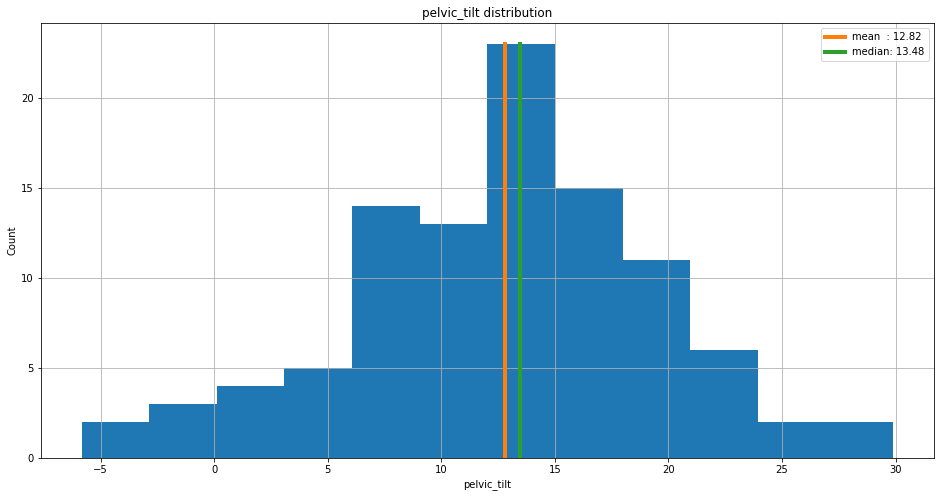

In [37]:
first_look(df_norm['pelvic_tilt'], bins=12)
df_norm.boxplot(column='pelvic_tilt')

In [11]:
df_norm['pelvic_tilt'].describe()

count    100.000000
mean      12.821414
std        6.778503
min       -5.845994
25%        8.799951
50%       13.482435
75%       16.785953
max       29.894119
Name: pelvic_tilt, dtype: float64

> **Вывод** Распределение для здоровых предполагает среднее значение около 13.
> Мода и среднее значение совпадают.
> Стандартное квадратичное отклонение = 6.8.
> Данные имеют тенденцию сдвига к положительным значениям.
> Выбросы отсутствуют.


### угол таза (pelvic incidence) [<a class='anchor' id='pelvic_incidence'>](http://)

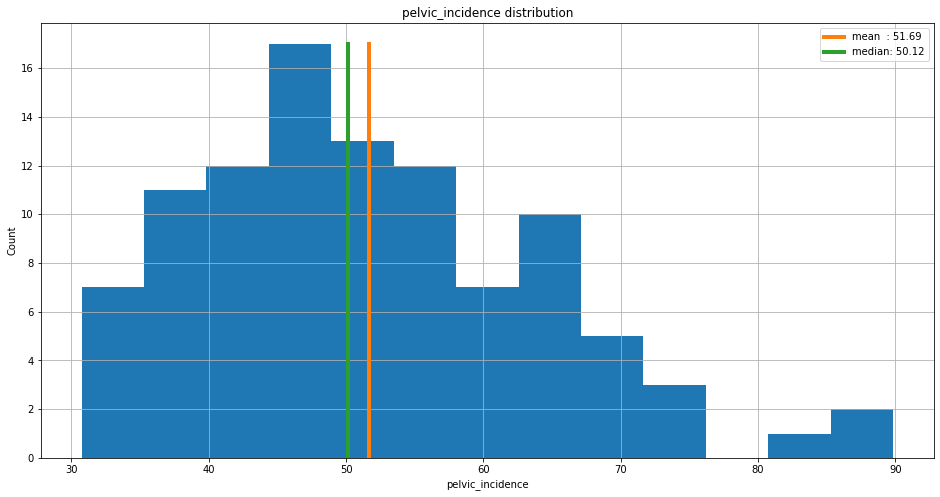

In [32]:
first_look(df_norm['pelvic_incidence'], bins=13)
df_norm.boxplot(column='pelvic_incidence')

In [14]:
df_norm['pelvic_incidence'].describe()

count    100.000000
mean      51.685244
std       12.368161
min       30.741938
25%       42.817849
50%       50.123115
75%       61.470097
max       89.834676
Name: pelvic_incidence, dtype: float64

> **Вывод** параметр имеет довольно равномерное распределение. Среднее значение около 50.
> Мода и среднее значение совпадают.
> имеются незначительные выбросы в высших значениях.
> Стандартное квадратичное отклонение = 12.4. Данные имеют тенденцию сдвига к меньшим значениям.

### Угол поясничного лордоза (lumbar lordosis angle) [<a class='anchor' id='lumbar_lordosis_angle'>](http://)

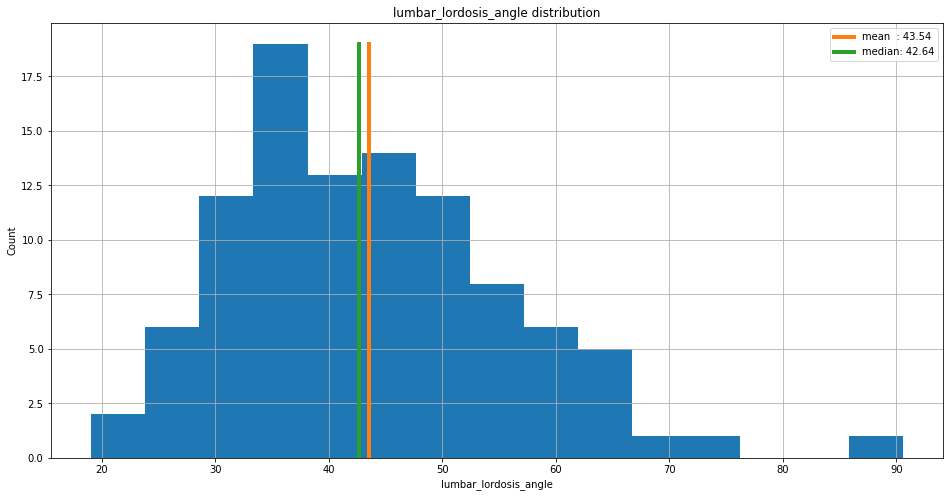

<AxesSubplot:>

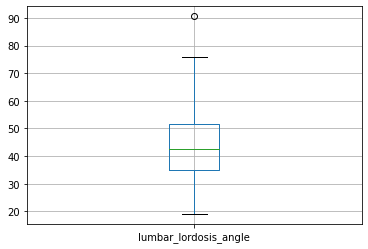

In [39]:
first_look(df_norm['lumbar_lordosis_angle'], bins=15)
df_norm.boxplot(column='lumbar_lordosis_angle')

In [40]:
df_norm['lumbar_lordosis_angle'].describe()

count    100.000000
mean      43.542605
std       12.361388
min       19.071075
25%       35.000000
50%       42.638923
75%       51.602346
max       90.563461
Name: lumbar_lordosis_angle, dtype: float64

> **Гипотеза** Стандартное квадратичное отклонение = 12.4.
> Данные незначительные выбросы в больших значениях.
> параметр имеет довольно равномерное распределение.
> Среднее значение около 43. Мода и среднее значение совпадают.

### Крестцовый склон (sacral slope) [<a class='anchor' id='sacral_slope'>](http://)

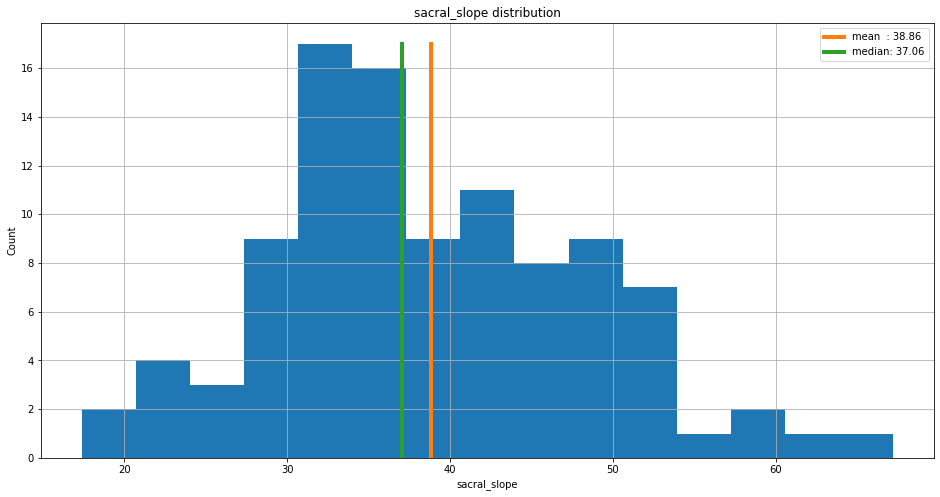

In [18]:
first_look(df_norm['sacral_slope'], bins=15)
df_norm.boxplot(column='sacral_slope')

In [20]:
df_norm['sacral_slope'].describe()

count    100.000000
mean      38.863830
std        9.624004
min       17.386972
25%       32.340487
50%       37.059694
75%       44.608788
max       67.195460
Name: sacral_slope, dtype: float64

> **Вывод** Среднее значение около 38. Мода и среднее значение совпадают.
> Стандартное квадратичное отклонение = 9.6. Выбросы отсутствуют

### радиус таза (pelvic radius) [<a class='anchor' id='pelvic_radius'>](http://)

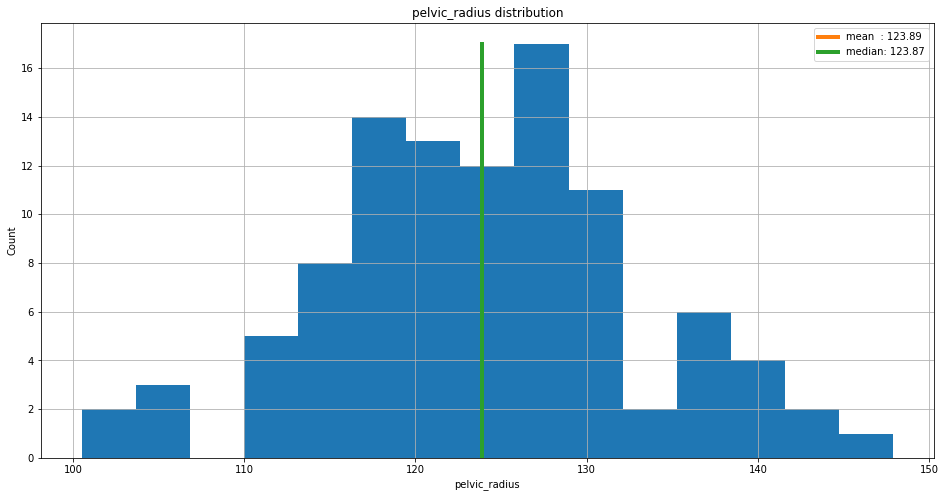

In [21]:
first_look(df_norm['pelvic_radius'], bins=15)
df_norm.boxplot(column='pelvic_radius')

In [23]:
df_norm['pelvic_radius'].describe()

count    100.000000
mean     123.890834
std        9.014246
min      100.501192
25%      118.182659
50%      123.874328
75%      129.040401
max      147.894637
Name: pelvic_radius, dtype: float64

> **Вывод** Среднее значение около 123. Мода и среднее значение совпадают.
> Стандартное квадратичное отклонение = 9. Выбросы отсутствуют

### Степень спондилолистеза (grade of spondylolisthesis) [<a class='anchor' id='spondylolisthesis'>](http://)

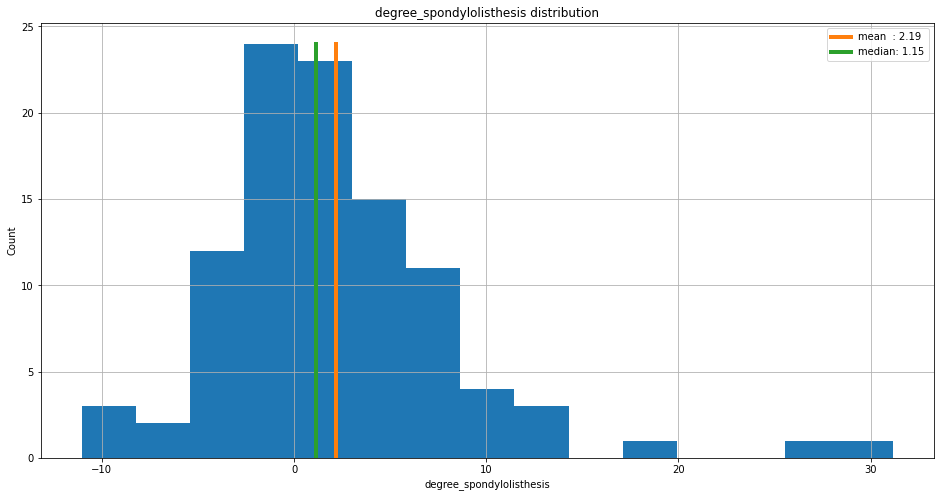

In [24]:
first_look(df_norm['degree_spondylolisthesis'], bins=15)
df_norm.boxplot(column='degree_spondylolisthesis')

In [26]:
df_norm['degree_spondylolisthesis'].describe()

count    100.000000
mean       2.186572
std        6.307483
min      -11.058179
25%       -1.511360
50%        1.152710
75%        4.968807
max       31.172767
Name: degree_spondylolisthesis, dtype: float64

> **Вывод** Среднее значение около 2.2. Мода и среднее значение практически совпадают.
> Стандартное квадратичное отклонение = 6.3
> Существуют выбросы среди больших значений

## Анализ корреляции признаков [<a class='anchor' id='corr'>](http://)

In [27]:
corr = df_norm.corr()
corr_round = np.round(corr, 2)
corr_round

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.00,0.63,0.70,0.84,-0.49,0.20
pelvic_tilt,0.63,1.00,0.30,0.11,-0.35,0.18
lumbar_lordosis_angle,0.70,0.30,1.00,0.69,-0.25,0.26
sacral_slope,0.84,0.11,0.69,1.00,-0.39,0.13
pelvic_radius,-0.49,-0.35,-0.25,-0.39,1.00,-0.06
degree_spondylolisthesis,0.20,0.18,0.26,0.13,-0.06,1.00


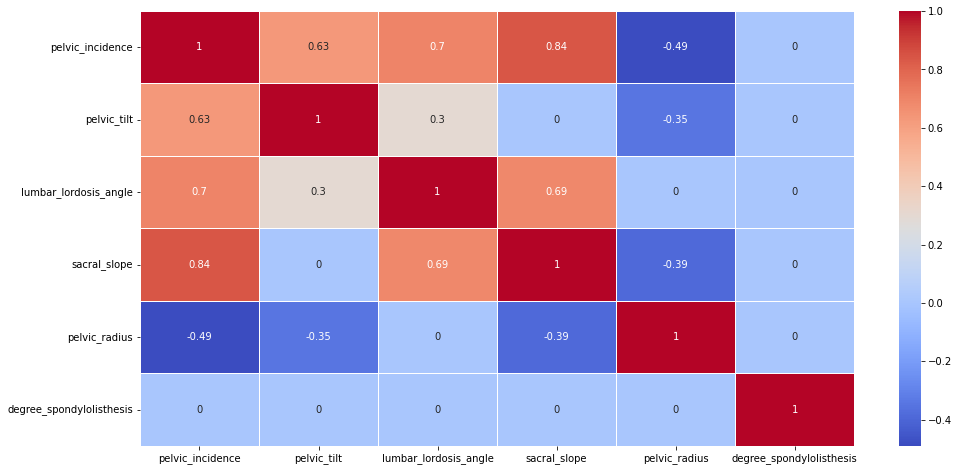

In [28]:
# уберем низкую корреляцию
corr_round[np.abs(corr) < 0.3] = 0
plt.figure(figsize = (16,8))
sns.heatmap(corr_round, annot=True, linewidths=.5, cmap='coolwarm')
plt.show()

> Признак pelvic_incidence (угол таза) имеет самую высокую корреляцию с другими признаками
(pelvic_tilt - 0.6, lumbar_lordosis_angle - 0.7, sacral_slope - 0.8)

> Самую низкую корреляцию показал признак pelvic_radius (радиус таза).

> **Гипотеза:** Признак pelvic_radius (радиус таза) возможно не влияет на характеристику состояния.

### Вывод ###

> Для анализа EDA представлен набор данных, который описывает здоровых пациентов из состава размеченных данных
по диагностике заболеваний. Данные имеют малое количество (100 измерений)  и слабо выраженные выбросы
> (практически везде медиана совпадает со среднем значением). Поэтому условные выбросы оставляем как есть, при выборе
> алгоритма классификации предлагается делать упор в сторону варианта функции потерь на основе MSE. Это означает,
> что мы принимаем "выбросы" за реальные данные.
>
> Реальную картину классификации возможно покажут сильно скоррелированный признак pelvic_incidence и
> слабо скоррелированный признак pelvic_radius. Признак pelvic_incidence в ряде случаем может выступать вместо остальных
> (pelvic_tilt, lumbar_lordosis_angle, sacral_slope). Признак pelvic_radius может также не влиять на целевую переменную.
>
> Следующим шагом вероятно будет анализ признаков в других описательных категориях и анализ кандидатов
> (pelvic_incidence, pelvic_radius) как наиболее влияющих на решение задачи классификации.


